In [37]:
pip install oracledb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import oracledb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conn = oracledb.connect(
    user="system",
    password="ayush",
    dsn="localhost:1521/ORCLPDB"
)

cursor = conn.cursor()

cursor.execute("SELECT username FROM all_users WHERE username = 'BANKING_CASE'")
result = cursor.fetchone()
print("Schema exists:", result)  # Returns None if schema doesn't exist


Schema exists: ('BANKING_CASE',)


In [3]:
df = pd.read_sql("SELECT * FROM BANKING", conn)

C:\Users\asus\AppData\Local\Temp\ipykernel_10992\3957459566.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM BANKING", conn)


In [4]:
conn.close()

In [5]:
df.head(5)

,CLIENT_ID,NAME,AGE,LOCATION_ID,JOINED_BANK,BANKING_CONTACT,NATIONALITY,OCCUPATION,FEE_STRUCTURE,LOYALTY_CLASSIFICATION,...,BANK_DEPOSITS,CHECKING_ACCOUNTS,SAVING_ACCOUNTS,FOREIGN_CURRENCY_ACCOUNT,BUSINESS_LENDING,PROPERTIES_OWNED,RISK_WEIGHTING,BRID,GENDERID,IAID
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [6]:
df.shape


(1392, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENT_ID                 1392 non-null   object 
 1   NAME                      1392 non-null   object 
 2   AGE                       1392 non-null   int64  
 3   LOCATION_ID               1392 non-null   int64  
 4   JOINED_BANK               1392 non-null   object 
 5   BANKING_CONTACT           1392 non-null   object 
 6   NATIONALITY               1392 non-null   object 
 7   OCCUPATION                1392 non-null   object 
 8   FEE_STRUCTURE             1392 non-null   object 
 9   LOYALTY_CLASSIFICATION    1392 non-null   object 
 10  ESTIMATED_INCOME          1392 non-null   float64
 11  SUPERANNUATION_SAVINGS    1392 non-null   float64
 12  AMOUNT_OF_CREDIT_CARDS    1392 non-null   int64  
 13  CREDIT_CARD_BALANCE       1392 non-null   float64
 14  BANK_LOA

In [8]:
# generate descriptive statistics for the dataframe
df.describe()

,AGE,LOCATION_ID,ESTIMATED_INCOME,SUPERANNUATION_SAVINGS,AMOUNT_OF_CREDIT_CARDS,CREDIT_CARD_BALANCE,BANK_LOANS,BANK_DEPOSITS,CHECKING_ACCOUNTS,SAVING_ACCOUNTS,FOREIGN_CURRENCY_ACCOUNT,BUSINESS_LENDING,PROPERTIES_OWNED,RISK_WEIGHTING,BRID,GENDERID,IAID
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1.392000e+03,1.392000e+03,1.392000e+03,1.392000e+03,1392.000000,1.392000e+03,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,51.618534,21294.507902,171268.305172,25769.757622,1.466236,3255.309684,5.979600e+05,6.974951e+05,3.277142e+05,2.410528e+05,30317.547277,8.807565e+05,1.531609,2.254310,2.553879,1.500718,10.438937
std,19.939889,12370.264981,111172.206010,16138.747973,0.673208,2566.057787,4.622190e+05,6.753225e+05,2.912352e+05,2.406874e+05,23342.565755,6.533572e+05,1.088668,1.138811,1.007506,0.500179,5.955431
min,17.000000,12.000000,15919.480000,1662.840000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,78.870000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10717.750000,83880.040000,12966.157500,1.000000,1252.695000,2.384524e+05,2.006767e+05,1.208467e+05,7.354548e+04,12246.560000,3.723738e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,20901.000000,142900.825000,22757.410000,1.000000,2618.600000,4.849483e+05,4.894368e+05,2.453668e+05,1.688015e+05,24464.710000,7.222240e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,31173.250000,242957.607500,35718.800000,2.000000,4636.052500,8.536094e+05,9.748266e+05,4.485184e+05,3.264072e+05,43206.840000,1.238666e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43366.000000,520328.350000,75963.900000,3.000000,13749.830000,2.667557e+06,3.890598e+06,1.969923e+06,1.712270e+06,124704.870000,3.619311e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
df['ESTIMATED_INCOME'].min()

15919.48

In [10]:
bins = [0,100000,300000,float('inf')]  # 'inf' means "anything higher"
labels = ['Low','Med','High']

df['Income_Band'] = pd.cut(df['ESTIMATED_INCOME'],bins = bins , labels = labels ,right = False)

<Axes: xlabel='Income_Band'>

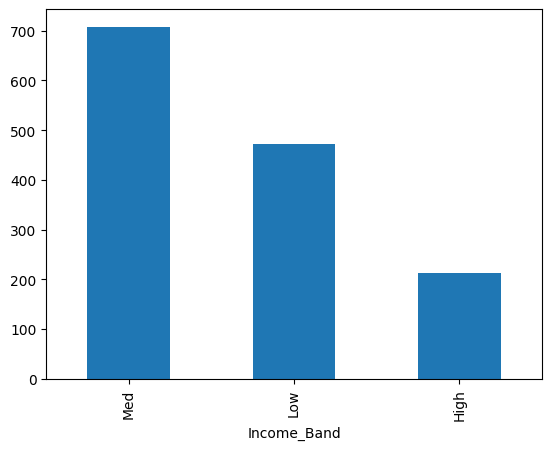

In [11]:
df['Income_Band'].value_counts().plot(kind = 'bar')

In [12]:
# Examine the distribution of unique categorical columns 
categorical_cols = df[["BRID","GENDERID","IAID","AMOUNT_OF_CREDIT_CARDS","NATIONALITY","OCCUPATION","FEE_STRUCTURE","LOYALTY_CLASSIFICATION","PROPERTIES_OWNED","RISK_WEIGHTING","Income_Band"]].columns

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'BRID':


BRID
3    627
1    308
2    231
4    226
Name: count, dtype: int64

Value Counts for 'GENDERID':


GENDERID
2    697
1    695
Name: count, dtype: int64

Value Counts for 'IAID':


IAID
12    84
15    84
10    84
8     83
14    82
11    82
9     82
1     82
3     81
13    80
4     80
2     79
5     43
7     42
17    42
6     41
18    41
21    41
16    40
19    40
22    40
20    39
Name: count, dtype: int64

Value Counts for 'AMOUNT_OF_CREDIT_CARDS':


AMOUNT_OF_CREDIT_CARDS
1    885
2    365
3    142
Name: count, dtype: int64

Value Counts for 'NATIONALITY':


NATIONALITY
European      611
Asian         351
American      231
Australian    116
African        83
Name: count, dtype: int64

Value Counts for 'OCCUPATION':


OCCUPATION
Paralegal                      16
Associate Professor            14
Assistant Professor            14
Automation Specialist IV       14
Junior Executive               13
                               ..
Mechanical Systems Engineer     2
Senior Sales Associate          2
Physical Therapy Assistant      2
Office Assistant IV             2
Developer III                   1
Name: count, Length: 189, dtype: int64

Value Counts for 'FEE_STRUCTURE':


FEE_STRUCTURE
High    666
Mid     461
Low     265
Name: count, dtype: int64

Value Counts for 'LOYALTY_CLASSIFICATION':


LOYALTY_CLASSIFICATION
Jade        619
Silver      349
Gold        273
Platinum    151
Name: count, dtype: int64

Value Counts for 'PROPERTIES_OWNED':


PROPERTIES_OWNED
1    385
2    356
3    345
0    306
Name: count, dtype: int64

Value Counts for 'RISK_WEIGHTING':


RISK_WEIGHTING
2    562
1    390
3    212
4    152
5     76
Name: count, dtype: int64

Value Counts for 'Income_Band':


Income_Band
Med     708
Low     472
High    212
Name: count, dtype: int64

# Univariate Analysis

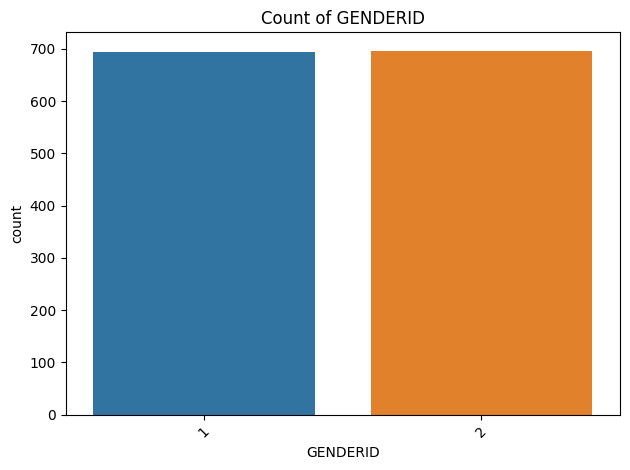

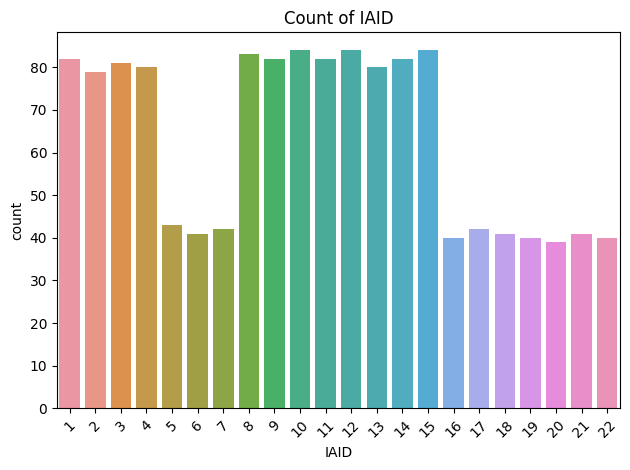

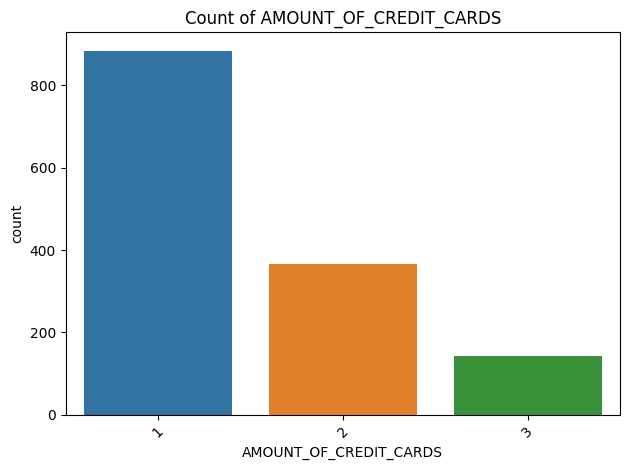

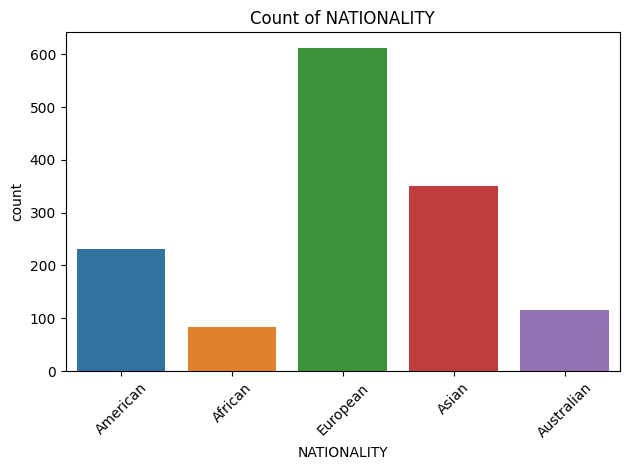

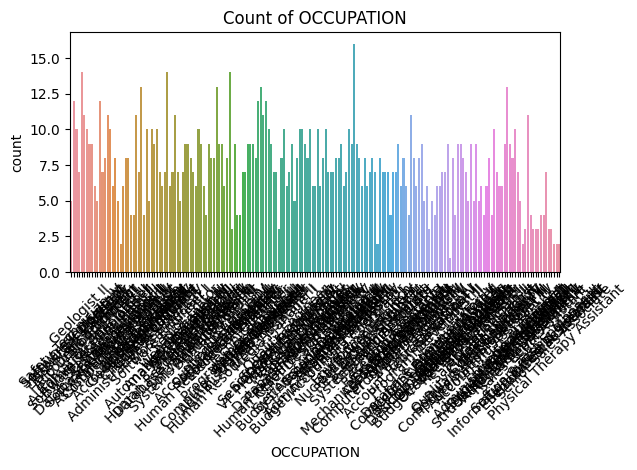

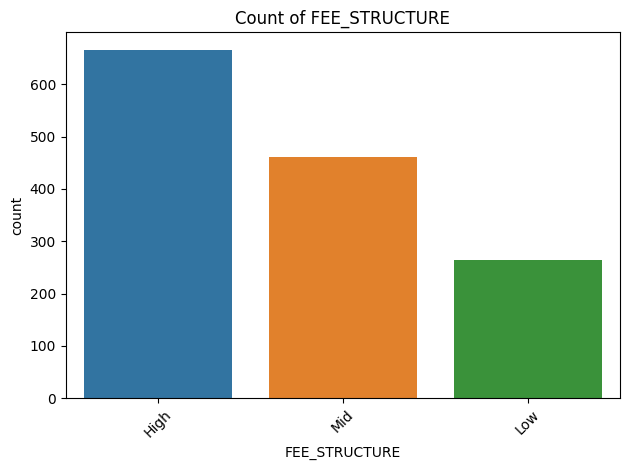

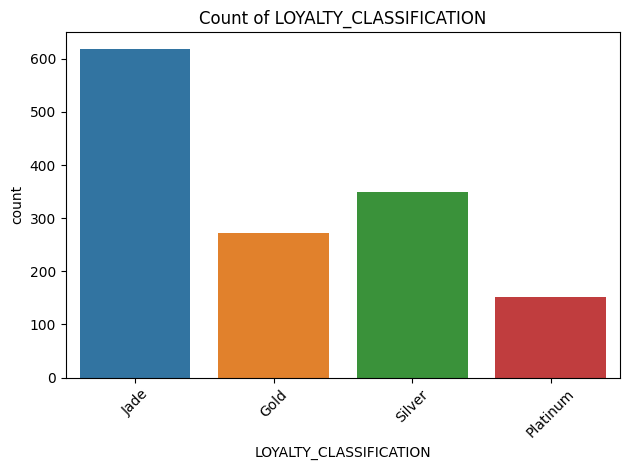

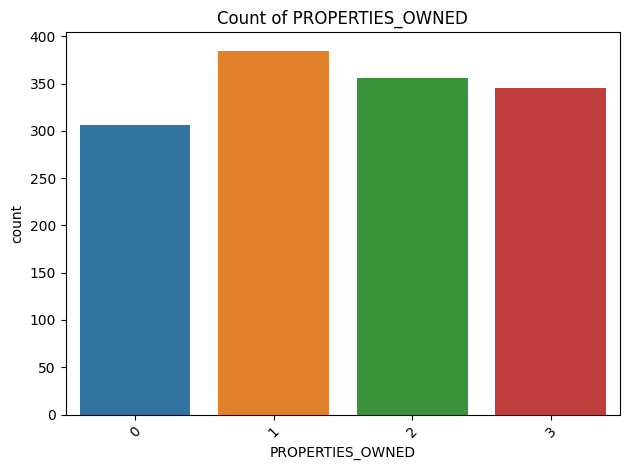

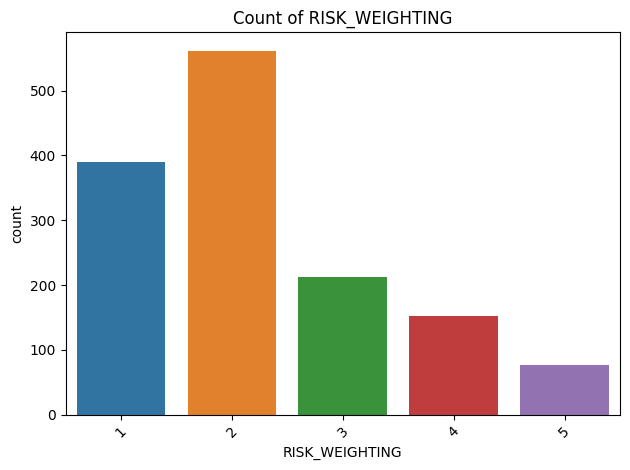

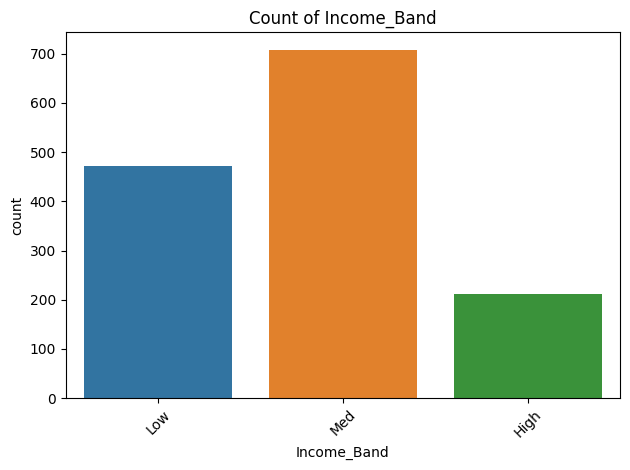

In [13]:
for i, predictor in enumerate(df[["GENDERID", "IAID", "AMOUNT_OF_CREDIT_CARDS", "NATIONALITY", "OCCUPATION", "FEE_STRUCTURE", "LOYALTY_CLASSIFICATION", "PROPERTIES_OWNED", "RISK_WEIGHTING", "Income_Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor )
    plt.title(f'Count of {predictor}')
    plt.xticks(rotation=45)  # Rotate x-labels if needed
    plt.tight_layout()  # Prevent label overlap
plt.show()

#  Bivariate Analysis

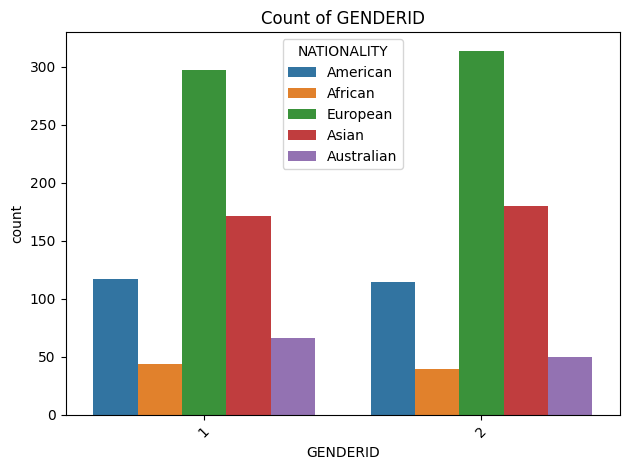

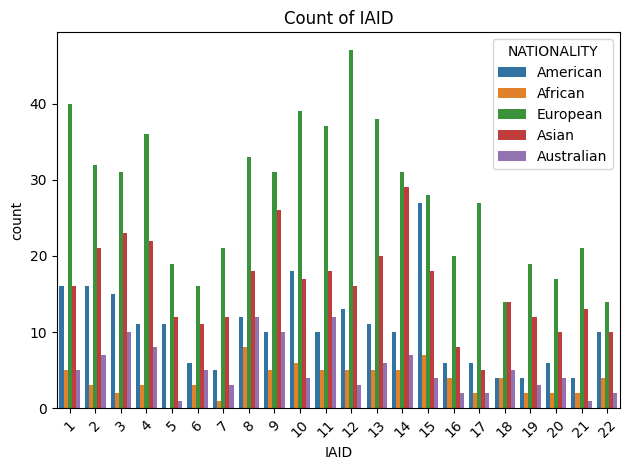

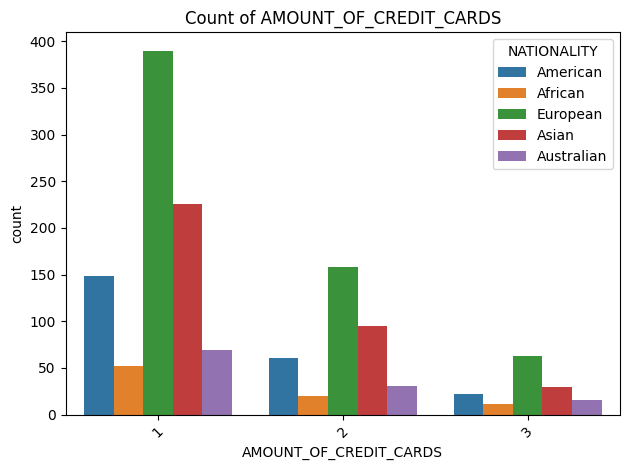

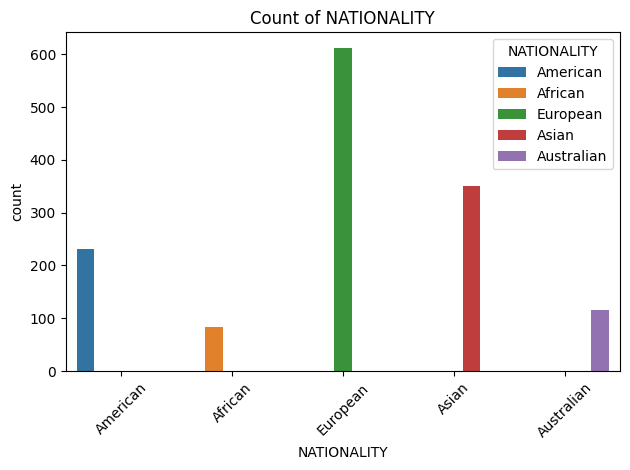

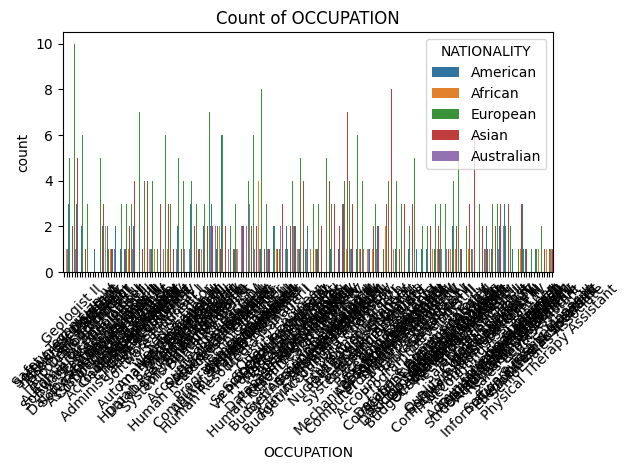

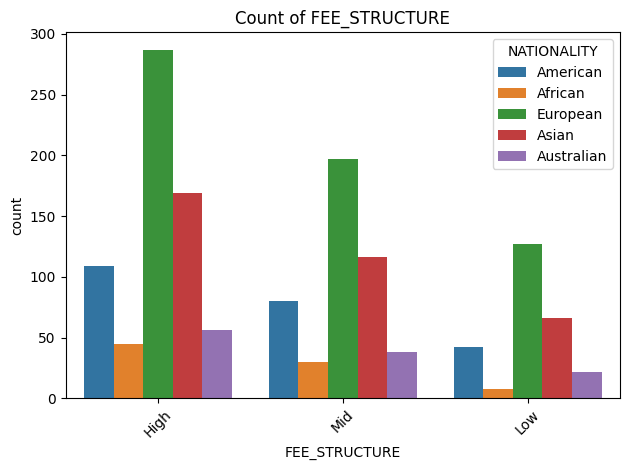

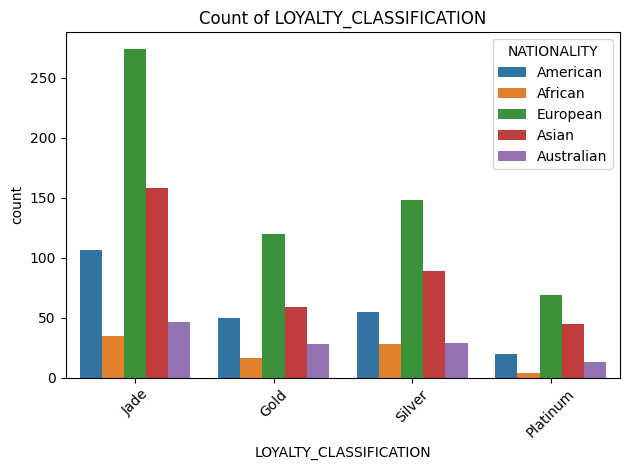

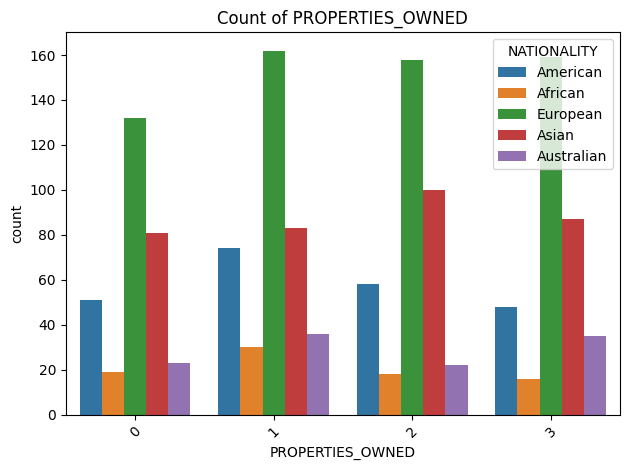

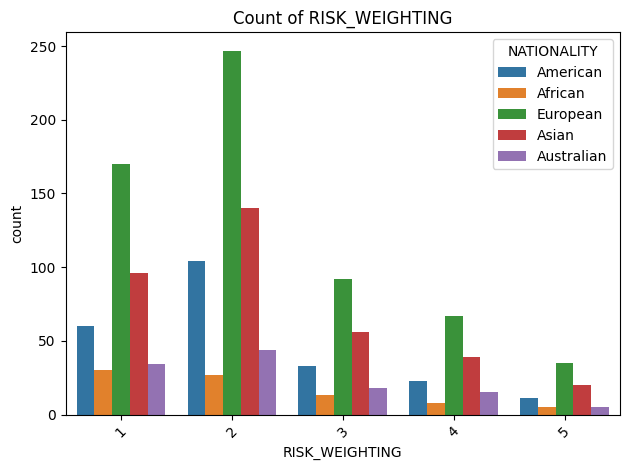

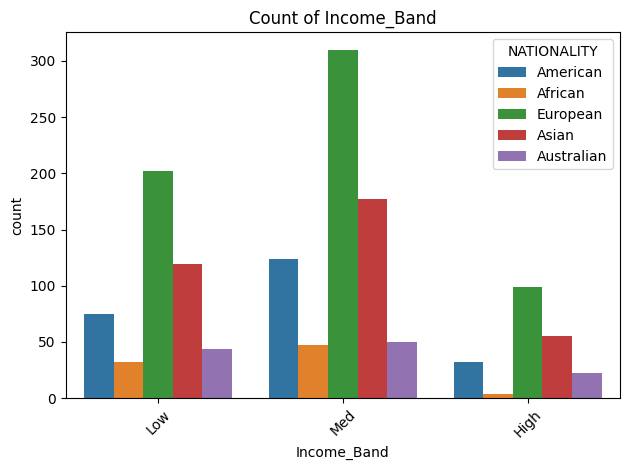

In [14]:
for i, predictor in enumerate(df[["GENDERID", "IAID", "AMOUNT_OF_CREDIT_CARDS", "NATIONALITY", "OCCUPATION", "FEE_STRUCTURE", "LOYALTY_CLASSIFICATION", "PROPERTIES_OWNED", "RISK_WEIGHTING", "Income_Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor,hue = 'NATIONALITY')
    plt.title(f'Count of {predictor}')
    plt.xticks(rotation=45)  # Rotate x-labels if needed
    plt.tight_layout()  # Prevent label overlap
plt.show()

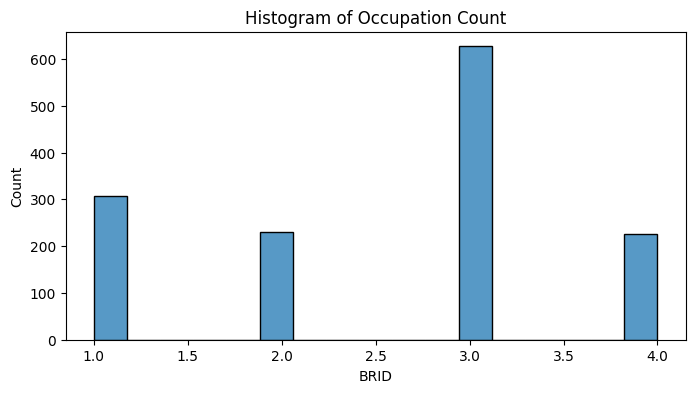

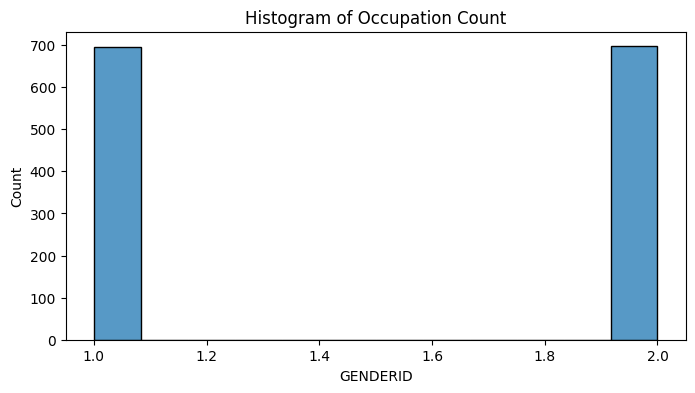

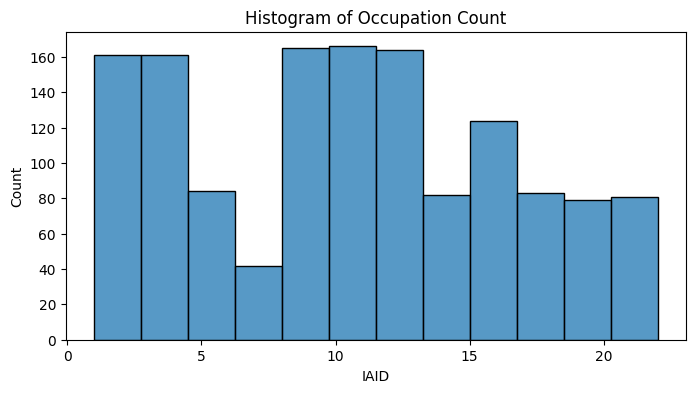

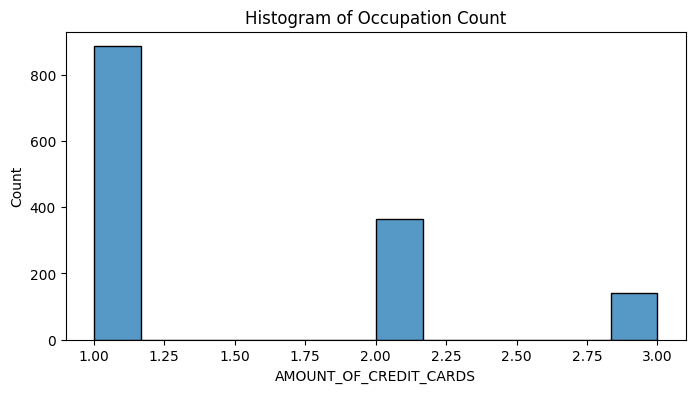

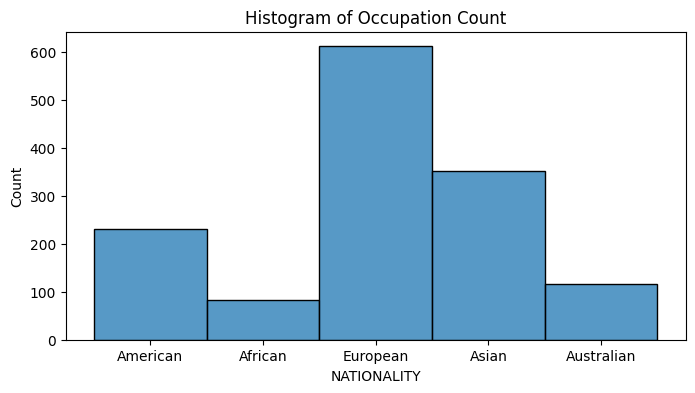

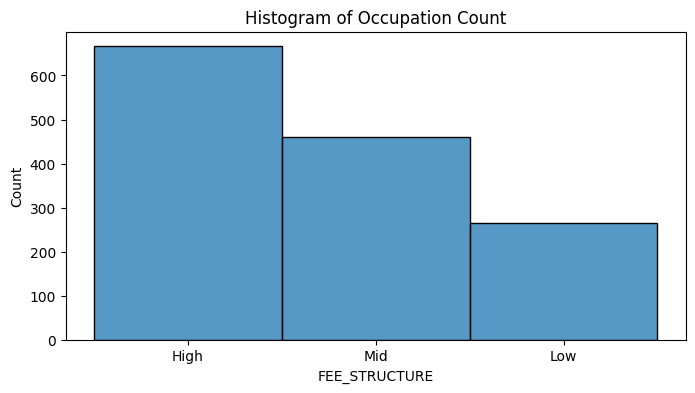

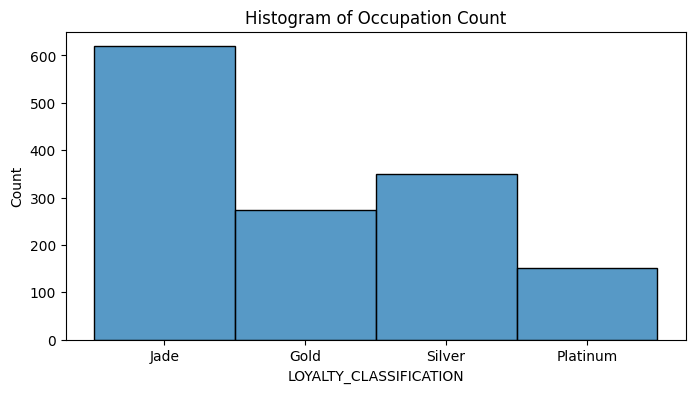

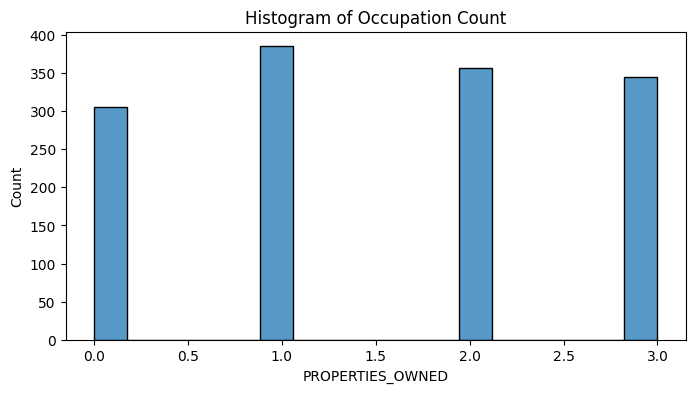

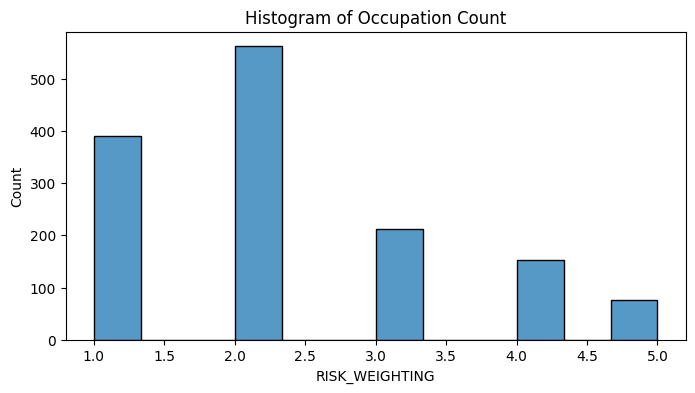

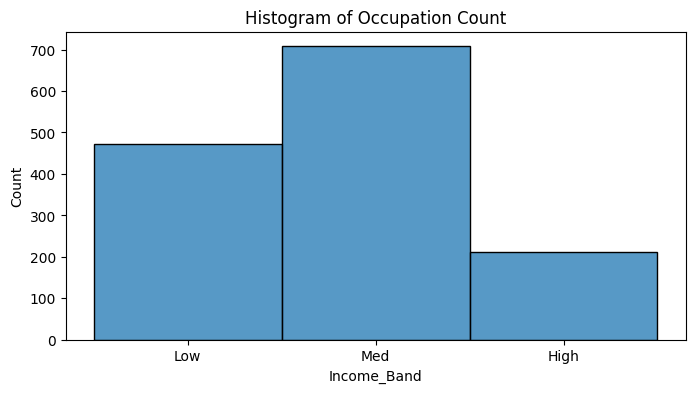

In [15]:
# histplot of value counts for different Occupation

for col in categorical_cols:
    if col=="OCCUPATION":
        continue
    plt.figure(figsize = (8,4))
    sns.histplot(df[col])
    plt.title("Histogram of Occupation Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Numerical Analysis 

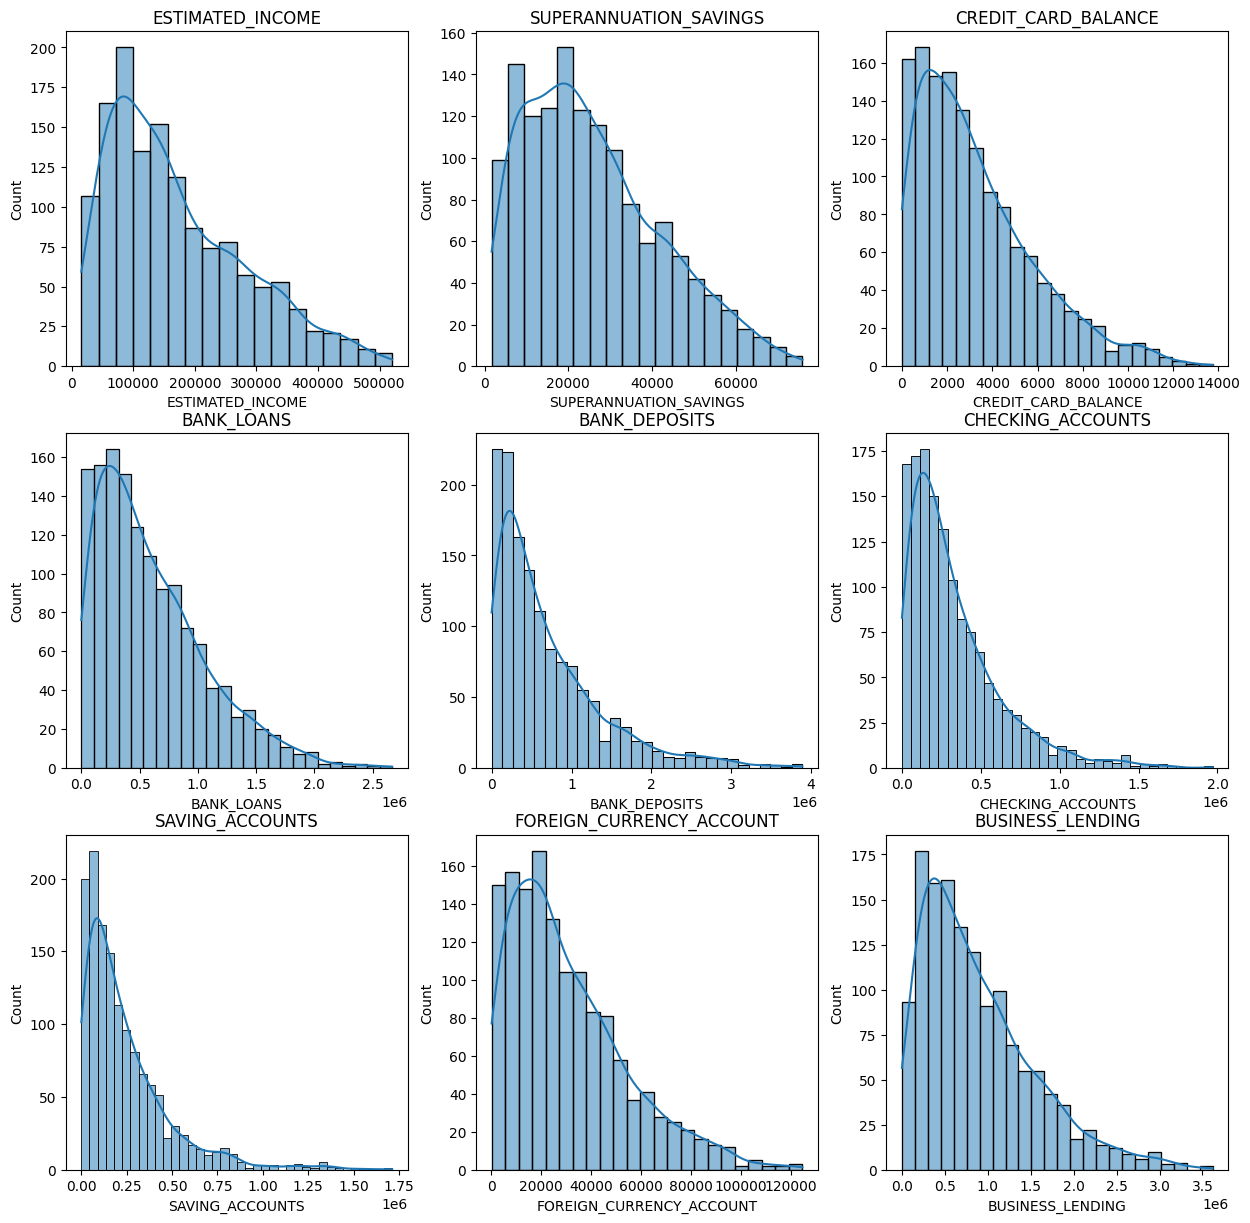

In [25]:
numerical_cols = ['ESTIMATED_INCOME','SUPERANNUATION_SAVINGS',"CREDIT_CARD_BALANCE","BANK_LOANS","BANK_DEPOSITS","CHECKING_ACCOUNTS","SAVING_ACCOUNTS","FOREIGN_CURRENCY_ACCOUNT","BUSINESS_LENDING"]

# univariate analysis and visualization
plt.figure(figsize=(15,20))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

# Heat Maps

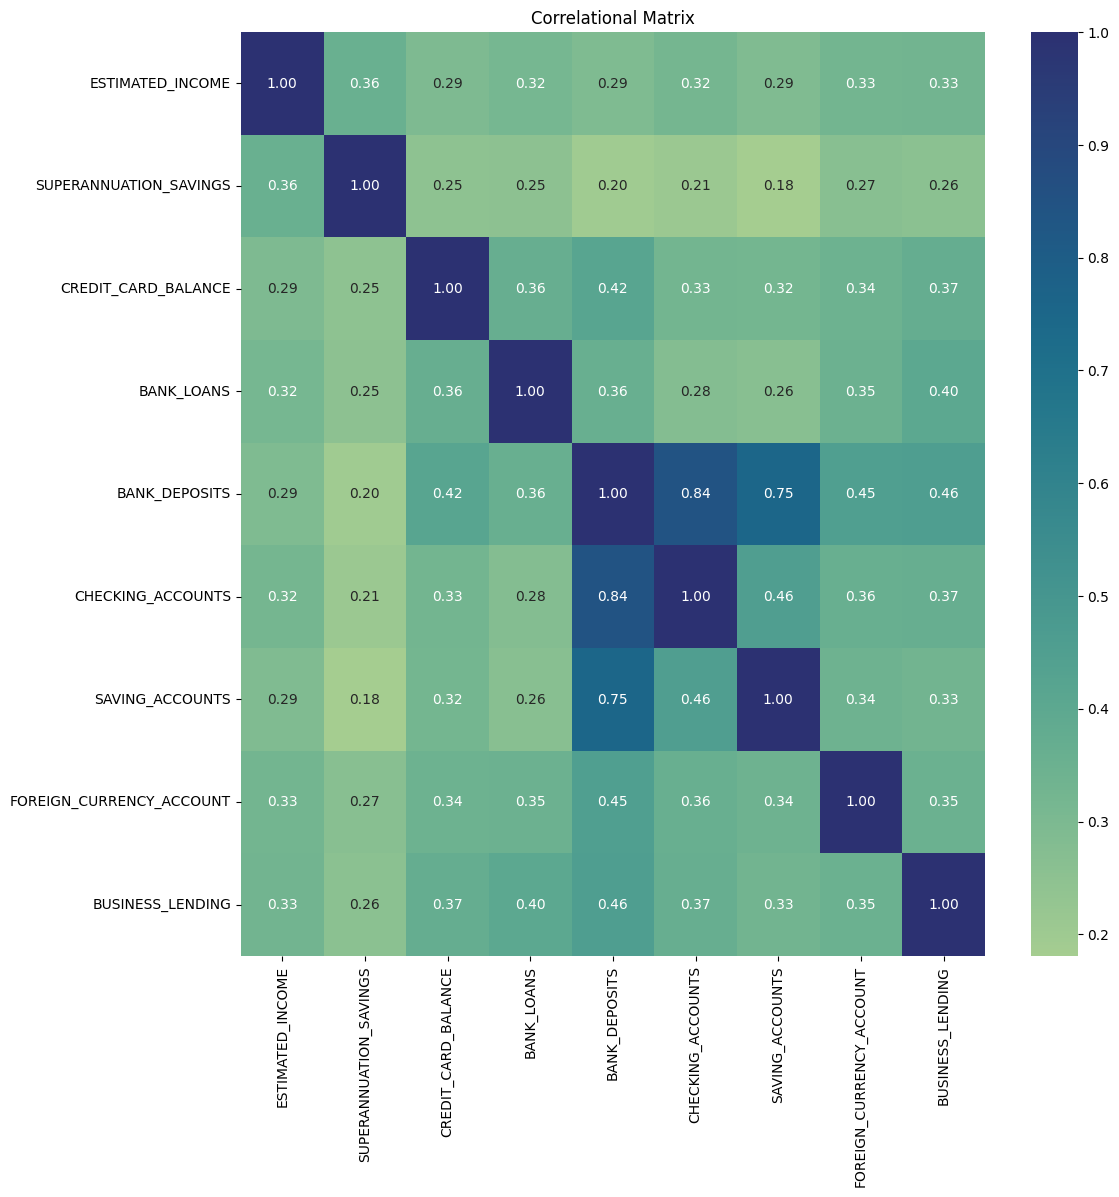

In [26]:
numerical_cols = ['ESTIMATED_INCOME','SUPERANNUATION_SAVINGS',"CREDIT_CARD_BALANCE","BANK_LOANS","BANK_DEPOSITS","CHECKING_ACCOUNTS","SAVING_ACCOUNTS","FOREIGN_CURRENCY_ACCOUNT","BUSINESS_LENDING"]
correlational_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlational_matrix,annot = True, cmap = 'crest',fmt =".2f")
plt.title("Correlational Matrix")
plt.show()